In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score, r2_score, mean_absolute_error,precision_score,recall_score,f1_score,root_mean_squared_error, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [56]:
df = pd.read_csv(r"C:\Users\anuja\Downloads\archive (3)\generative_ai_misinformation_dataset.csv")
df

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,06-03-2024 10:01,06-03-2024,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,07-08-2025 18:30,07-08-2025,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,13-12-2024 03:15,13-12-2024,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,05-04-2024 07:10,05-04-2024,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,07-06-2024 06:18,07-06-2024,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,P0496,Reddit,31-07-2024 17:25,31-07-2024,17:25:00,July,Wednesday,UK,Birmingham,...,-0.602,0.418,human,0.751,0.101,FALSE,5,0.276,5181,0
496,497,P0497,Telegram,13-08-2024 02:42,13-08-2024,02:42:00,August,Tuesday,Germany,Berlin,...,-0.136,0.980,GPT-like,0.068,0.519,TRUE,5,0.971,8784,0
497,498,P0498,Facebook,01-02-2025 21:59,01-02-2025,21:59:00,February,Saturday,UK,London,...,-0.773,0.404,human,0.738,0.705,FALSE,3,0.347,8372,0
498,499,P0499,Twitter,26-08-2024 00:39,26-08-2024,00:39:00,August,Monday,Brazil,Brasilia,...,-0.205,0.264,human,0.205,0.483,PARTLY,2,0.287,8171,1


In [57]:
df.isnull().sum()

id                           0
post_id                      0
platform                     0
timestamp                    0
date                         0
time                         0
month                        0
weekday                      0
country                      0
city                         0
timezone                     0
author_id                    0
author_followers             0
author_verified              0
text                         0
text_length                  0
token_count                  0
readability_score            0
num_urls                     0
num_mentions                 0
num_hashtags                 0
sentiment_score              0
toxicity_score               0
model_signature              0
detected_synthetic_score     0
embedding_sim_to_facts       0
factcheck_verdict            0
external_factchecks_count    0
source_domain_reliability    0
engagement                   0
is_misinformation            0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         500 non-null    int64  
 1   post_id                    500 non-null    object 
 2   platform                   500 non-null    object 
 3   timestamp                  500 non-null    object 
 4   date                       500 non-null    object 
 5   time                       500 non-null    object 
 6   month                      500 non-null    object 
 7   weekday                    500 non-null    object 
 8   country                    500 non-null    object 
 9   city                       500 non-null    object 
 10  timezone                   500 non-null    object 
 11  author_id                  500 non-null    object 
 12  author_followers           500 non-null    int64  
 13  author_verified            500 non-null    int64  

In [59]:
df.duplicated().value_counts(),len(df)

(False    500
 Name: count, dtype: int64,
 500)

In [60]:
df.columns

Index(['id', 'post_id', 'platform', 'timestamp', 'date', 'time', 'month',
       'weekday', 'country', 'city', 'timezone', 'author_id',
       'author_followers', 'author_verified', 'text', 'text_length',
       'token_count', 'readability_score', 'num_urls', 'num_mentions',
       'num_hashtags', 'sentiment_score', 'toxicity_score', 'model_signature',
       'detected_synthetic_score', 'embedding_sim_to_facts',
       'factcheck_verdict', 'external_factchecks_count',
       'source_domain_reliability', 'engagement', 'is_misinformation'],
      dtype='object')

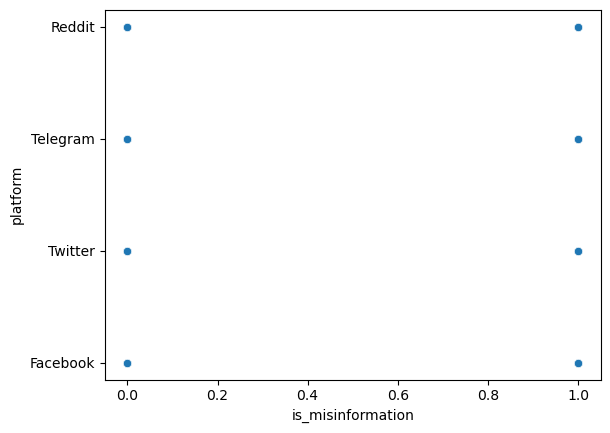

In [61]:
sns.scatterplot(x = df["is_misinformation"], y = df["platform"])
plt.show()

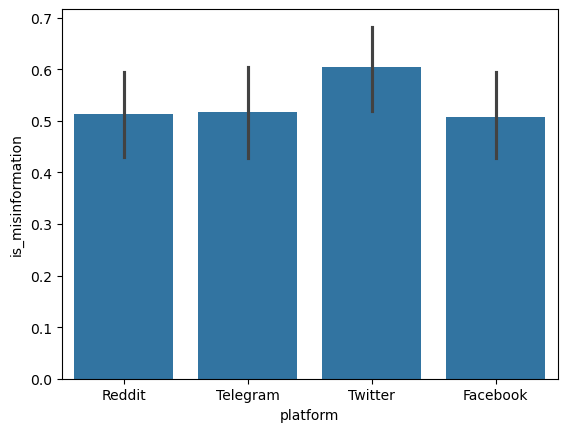

In [62]:
sns.barplot(y = df["is_misinformation"],x = df["platform"], data = df)
plt.show()

In [63]:
df[df['is_misinformation'] == df['is_misinformation'].max()]

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,06-03-2024 10:01,06-03-2024,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
3,4,P0004,Twitter,05-04-2024 07:10,05-04-2024,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
5,6,P0006,Twitter,28-08-2024 12:07,28-08-2024,12:07:00,August,Wednesday,India,Delhi,...,-0.761,0.713,unknown,0.761,0.561,UNVERIFIED,1,0.494,4351,1
8,9,P0009,Facebook,01-06-2025 15:16,01-06-2025,15:16:00,June,Sunday,UK,London,...,-0.542,0.077,human,0.290,0.161,UNVERIFIED,1,0.808,7239,1
10,11,P0011,Twitter,28-12-2024 17:56,28-12-2024,17:56:00,December,Saturday,India,Bangalore,...,0.615,0.896,human,0.318,0.110,UNVERIFIED,3,0.427,4065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,P0486,Reddit,12-03-2024 12:18,12-03-2024,12:18:00,March,Tuesday,USA,New York,...,-0.239,0.163,unknown,0.786,0.734,TRUE,1,0.025,5353,1
486,487,P0487,Twitter,12-05-2024 17:26,12-05-2024,17:26:00,May,Sunday,Germany,Berlin,...,0.678,0.011,GPT-like,0.704,0.970,FALSE,1,0.235,9891,1
489,490,P0490,Twitter,02-09-2024 05:17,02-09-2024,05:17:00,September,Monday,Germany,Hamburg,...,-0.737,0.865,GPT-like,0.157,0.310,TRUE,0,0.871,8264,1
494,495,P0495,Telegram,29-01-2024 00:21,29-01-2024,00:21:00,January,Monday,USA,New York,...,-0.887,0.374,human,0.944,0.642,FALSE,4,0.632,1764,1


In [64]:
df.head(1)

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,06-03-2024 10:01,06-03-2024,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1


In [65]:
df["is_misinformation"].max()

1

In [66]:
df.iloc[:,:]

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,06-03-2024 10:01,06-03-2024,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,07-08-2025 18:30,07-08-2025,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,13-12-2024 03:15,13-12-2024,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,05-04-2024 07:10,05-04-2024,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,07-06-2024 06:18,07-06-2024,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,P0496,Reddit,31-07-2024 17:25,31-07-2024,17:25:00,July,Wednesday,UK,Birmingham,...,-0.602,0.418,human,0.751,0.101,FALSE,5,0.276,5181,0
496,497,P0497,Telegram,13-08-2024 02:42,13-08-2024,02:42:00,August,Tuesday,Germany,Berlin,...,-0.136,0.980,GPT-like,0.068,0.519,TRUE,5,0.971,8784,0
497,498,P0498,Facebook,01-02-2025 21:59,01-02-2025,21:59:00,February,Saturday,UK,London,...,-0.773,0.404,human,0.738,0.705,FALSE,3,0.347,8372,0
498,499,P0499,Twitter,26-08-2024 00:39,26-08-2024,00:39:00,August,Monday,Brazil,Brasilia,...,-0.205,0.264,human,0.205,0.483,PARTLY,2,0.287,8171,1


<Axes: >

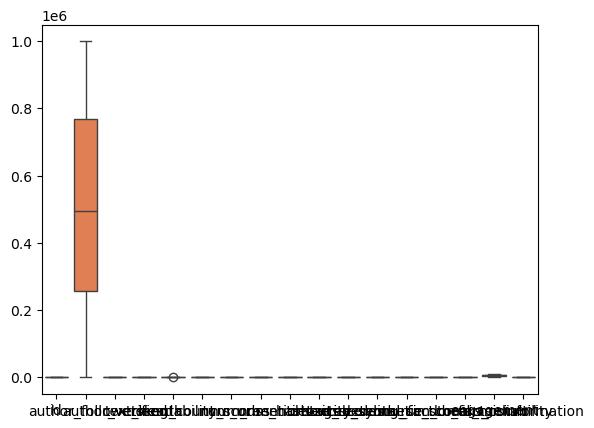

In [67]:
sns.boxplot(df)

In [68]:
def outlier(df,columns):
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        Lower_bound = Q1 - (1.5*IQR)
        upper_bound = Q3 + (1.5*IQR)
        
        df = df [(df[col]>= Lower_bound) & (df[col]<= upper_bound)]
    return df

df = outlier(df,['is_misinformation'])
df

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,06-03-2024 10:01,06-03-2024,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,07-08-2025 18:30,07-08-2025,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,13-12-2024 03:15,13-12-2024,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,05-04-2024 07:10,05-04-2024,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,07-06-2024 06:18,07-06-2024,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,P0496,Reddit,31-07-2024 17:25,31-07-2024,17:25:00,July,Wednesday,UK,Birmingham,...,-0.602,0.418,human,0.751,0.101,FALSE,5,0.276,5181,0
496,497,P0497,Telegram,13-08-2024 02:42,13-08-2024,02:42:00,August,Tuesday,Germany,Berlin,...,-0.136,0.980,GPT-like,0.068,0.519,TRUE,5,0.971,8784,0
497,498,P0498,Facebook,01-02-2025 21:59,01-02-2025,21:59:00,February,Saturday,UK,London,...,-0.773,0.404,human,0.738,0.705,FALSE,3,0.347,8372,0
498,499,P0499,Twitter,26-08-2024 00:39,26-08-2024,00:39:00,August,Monday,Brazil,Brasilia,...,-0.205,0.264,human,0.205,0.483,PARTLY,2,0.287,8171,1


In [69]:
df1 =  df.drop(columns=["id","post_id","author_id","time","date","factcheck_verdict","external_factchecks_count","embedding_sim_to_facts","model_signature","detected_synthetic_score","timezone","timestamp","city","engagement"])
df1

,platform,month,weekday,country,author_followers,author_verified,text,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,source_domain_reliability,is_misinformation
0,Reddit,March,Wednesday,USA,74491,0,Sample post content 1 about AI and misinformat...,137,34,44.05,1,0,0,-0.223,0.271,0.543,1
1,Reddit,August,Thursday,Germany,199709,0,Sample post content 2 about AI and misinformat...,144,24,68.61,0,5,3,-0.718,0.802,0.199,0
2,Telegram,December,Friday,USA,470455,0,Sample post content 3 about AI and misinformat...,118,29,68.56,3,1,2,-0.989,0.815,0.074,0
3,Twitter,April,Friday,USA,224180,1,Sample post content 4 about AI and misinformat...,228,38,46.54,0,1,3,-0.283,0.116,0.064,1
4,Telegram,June,Friday,Germany,63968,1,Sample post content 5 about AI and misinformat...,131,43,74.36,0,0,4,-0.378,0.325,0.472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Reddit,July,Wednesday,UK,224214,0,Sample post content 496 about AI and misinform...,239,79,43.89,2,2,1,-0.602,0.418,0.276,0
496,Telegram,August,Tuesday,Germany,70651,0,Sample post content 497 about AI and misinform...,162,32,38.97,3,2,4,-0.136,0.980,0.971,0
497,Facebook,February,Saturday,UK,666266,1,Sample post content 498 about AI and misinform...,88,17,51.14,3,0,2,-0.773,0.404,0.347,0
498,Twitter,August,Monday,Brazil,773808,1,Sample post content 499 about AI and misinform...,83,16,43.43,1,4,0,-0.205,0.264,0.287,1


In [70]:
df1.iloc[:,:]

,platform,month,weekday,country,author_followers,author_verified,text,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,source_domain_reliability,is_misinformation
0,Reddit,March,Wednesday,USA,74491,0,Sample post content 1 about AI and misinformat...,137,34,44.05,1,0,0,-0.223,0.271,0.543,1
1,Reddit,August,Thursday,Germany,199709,0,Sample post content 2 about AI and misinformat...,144,24,68.61,0,5,3,-0.718,0.802,0.199,0
2,Telegram,December,Friday,USA,470455,0,Sample post content 3 about AI and misinformat...,118,29,68.56,3,1,2,-0.989,0.815,0.074,0
3,Twitter,April,Friday,USA,224180,1,Sample post content 4 about AI and misinformat...,228,38,46.54,0,1,3,-0.283,0.116,0.064,1
4,Telegram,June,Friday,Germany,63968,1,Sample post content 5 about AI and misinformat...,131,43,74.36,0,0,4,-0.378,0.325,0.472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Reddit,July,Wednesday,UK,224214,0,Sample post content 496 about AI and misinform...,239,79,43.89,2,2,1,-0.602,0.418,0.276,0
496,Telegram,August,Tuesday,Germany,70651,0,Sample post content 497 about AI and misinform...,162,32,38.97,3,2,4,-0.136,0.980,0.971,0
497,Facebook,February,Saturday,UK,666266,1,Sample post content 498 about AI and misinform...,88,17,51.14,3,0,2,-0.773,0.404,0.347,0
498,Twitter,August,Monday,Brazil,773808,1,Sample post content 499 about AI and misinform...,83,16,43.43,1,4,0,-0.205,0.264,0.287,1


In [71]:
x = df1.drop(columns = 'is_misinformation')
y = df1['is_misinformation']

In [72]:
y

0      1
1      0
2      0
3      1
4      0
      ..
495    0
496    0
497    0
498    1
499    0
Name: is_misinformation, Length: 500, dtype: int64

In [73]:
x

,platform,month,weekday,country,author_followers,author_verified,text,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,source_domain_reliability
0,Reddit,March,Wednesday,USA,74491,0,Sample post content 1 about AI and misinformat...,137,34,44.05,1,0,0,-0.223,0.271,0.543
1,Reddit,August,Thursday,Germany,199709,0,Sample post content 2 about AI and misinformat...,144,24,68.61,0,5,3,-0.718,0.802,0.199
2,Telegram,December,Friday,USA,470455,0,Sample post content 3 about AI and misinformat...,118,29,68.56,3,1,2,-0.989,0.815,0.074
3,Twitter,April,Friday,USA,224180,1,Sample post content 4 about AI and misinformat...,228,38,46.54,0,1,3,-0.283,0.116,0.064
4,Telegram,June,Friday,Germany,63968,1,Sample post content 5 about AI and misinformat...,131,43,74.36,0,0,4,-0.378,0.325,0.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Reddit,July,Wednesday,UK,224214,0,Sample post content 496 about AI and misinform...,239,79,43.89,2,2,1,-0.602,0.418,0.276
496,Telegram,August,Tuesday,Germany,70651,0,Sample post content 497 about AI and misinform...,162,32,38.97,3,2,4,-0.136,0.980,0.971
497,Facebook,February,Saturday,UK,666266,1,Sample post content 498 about AI and misinform...,88,17,51.14,3,0,2,-0.773,0.404,0.347
498,Twitter,August,Monday,Brazil,773808,1,Sample post content 499 about AI and misinform...,83,16,43.43,1,4,0,-0.205,0.264,0.287


In [74]:
le = LabelEncoder
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = LabelEncoder().fit_transform(x[col])

In [75]:

LabelEncoder().fit_transform(y)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [77]:
x_train

,platform,month,weekday,country,author_followers,author_verified,text,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,source_domain_reliability
249,3,4,1,3,686391,0,168,80,26,71.99,2,3,2,-0.544,0.212,0.900
433,3,8,0,3,105855,1,372,122,30,40.79,3,2,1,-0.576,0.657,0.678
19,3,10,2,3,84541,0,112,191,38,76.84,1,1,3,0.290,0.174,0.138
322,3,7,0,4,327667,1,249,111,18,77.83,1,5,5,0.220,0.135,0.069
332,3,1,4,2,971623,1,260,141,28,53.11,0,0,4,-0.668,0.946,0.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,1,4,426723,1,9,90,30,56.63,3,5,1,-0.423,0.581,0.052
270,0,4,4,4,146,0,191,99,19,36.63,2,2,3,-0.308,0.976,0.862
348,2,4,6,1,425255,0,277,48,9,65.60,1,5,5,-0.012,0.828,0.826
435,1,6,6,0,837848,1,374,73,24,74.51,0,0,4,0.290,0.395,0.287


In [78]:
y_train

249    1
433    1
19     0
322    0
332    1
      ..
106    0
270    1
348    0
435    0
102    1
Name: is_misinformation, Length: 400, dtype: int64

In [79]:
x_train.shape, y_train.shape

((400, 16), (400,))

In [80]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [81]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
rfr.predict(x_test)

array([0.58, 0.49, 0.65, 0.62, 0.6 , 0.35, 0.45, 0.59, 0.74, 0.57, 0.53,
       0.48, 0.38, 0.53, 0.43, 0.38, 0.78, 0.32, 0.38, 0.43, 0.36, 0.66,
       0.46, 0.48, 0.52, 0.59, 0.76, 0.79, 0.49, 0.59, 0.68, 0.57, 0.57,
       0.26, 0.63, 0.33, 0.22, 0.42, 0.42, 0.52, 0.5 , 0.62, 0.58, 0.49,
       0.52, 0.44, 0.31, 0.71, 0.57, 0.27, 0.55, 0.37, 0.49, 0.56, 0.46,
       0.5 , 0.38, 0.67, 0.6 , 0.44, 0.63, 0.63, 0.59, 0.62, 0.71, 0.84,
       0.33, 0.55, 0.51, 0.6 , 0.57, 0.53, 0.42, 0.38, 0.59, 0.47, 0.56,
       0.37, 0.58, 0.5 , 0.62, 0.41, 0.71, 0.53, 0.41, 0.75, 0.53, 0.71,
       0.58, 0.42, 0.61, 0.26, 0.61, 0.47, 0.64, 0.47, 0.56, 0.52, 0.68,
       0.75])

In [83]:
y_pred = rfr.predict(x_test)
y_pred


array([0.58, 0.49, 0.65, 0.62, 0.6 , 0.35, 0.45, 0.59, 0.74, 0.57, 0.53,
       0.48, 0.38, 0.53, 0.43, 0.38, 0.78, 0.32, 0.38, 0.43, 0.36, 0.66,
       0.46, 0.48, 0.52, 0.59, 0.76, 0.79, 0.49, 0.59, 0.68, 0.57, 0.57,
       0.26, 0.63, 0.33, 0.22, 0.42, 0.42, 0.52, 0.5 , 0.62, 0.58, 0.49,
       0.52, 0.44, 0.31, 0.71, 0.57, 0.27, 0.55, 0.37, 0.49, 0.56, 0.46,
       0.5 , 0.38, 0.67, 0.6 , 0.44, 0.63, 0.63, 0.59, 0.62, 0.71, 0.84,
       0.33, 0.55, 0.51, 0.6 , 0.57, 0.53, 0.42, 0.38, 0.59, 0.47, 0.56,
       0.37, 0.58, 0.5 , 0.62, 0.41, 0.71, 0.53, 0.41, 0.75, 0.53, 0.71,
       0.58, 0.42, 0.61, 0.26, 0.61, 0.47, 0.64, 0.47, 0.56, 0.52, 0.68,
       0.75])

In [84]:
y_pred_t = rfr.predict(x_train)
y_pred_t

array([0.89, 0.96, 0.16, 0.22, 0.79, 0.73, 0.92, 0.83, 0.26, 0.8 , 0.78,
       0.75, 0.2 , 0.78, 0.21, 0.22, 0.76, 0.77, 0.74, 0.86, 0.89, 0.14,
       0.96, 0.14, 0.13, 0.11, 0.25, 0.78, 0.86, 0.77, 0.78, 0.8 , 0.75,
       0.76, 0.83, 0.16, 0.83, 0.15, 0.8 , 0.2 , 0.24, 0.77, 0.15, 0.86,
       0.24, 0.24, 0.24, 0.94, 0.91, 0.23, 0.94, 0.16, 0.87, 0.19, 0.24,
       0.84, 0.79, 0.89, 0.92, 0.2 , 0.88, 0.2 , 0.83, 0.96, 0.83, 0.8 ,
       0.22, 0.2 , 0.8 , 0.2 , 0.9 , 0.19, 0.8 , 0.83, 0.17, 0.79, 0.96,
       0.81, 0.22, 0.24, 0.81, 0.84, 0.86, 0.23, 0.8 , 0.81, 0.25, 0.25,
       0.82, 0.17, 0.27, 0.8 , 0.13, 0.87, 0.08, 0.87, 0.31, 0.28, 0.21,
       0.83, 0.23, 0.89, 0.21, 0.88, 0.25, 0.79, 0.8 , 0.17, 0.84, 0.17,
       0.91, 0.85, 0.76, 0.18, 0.89, 0.75, 0.23, 0.19, 0.16, 0.07, 0.11,
       0.22, 0.21, 0.19, 0.7 , 0.82, 0.21, 0.83, 0.78, 0.15, 0.88, 0.81,
       0.84, 0.17, 0.17, 0.91, 0.81, 0.2 , 0.85, 0.27, 0.93, 0.26, 0.23,
       0.87, 0.24, 0.79, 0.3 , 0.13, 0.21, 0.13, 0.

In [85]:
print("accuracy of train :",r2_score(y_train,y_pred_t))

accuracy of train : 0.8531826968943788


In [86]:
print("accuracy of train :",r2_score(y_test,y_pred))

accuracy of train : -0.014153535353535363


## inference :
The model performs very well on training data but poorly on test data, indicating overfitting and weak generalization to unseen data.

In [87]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import load_boston
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# Example data
#X, y = load_boston(return_X_y=True)

# Model
model = RandomForestRegressor(random_state=42)

# Cross-validation with multiple metrics
results = cross_validate(
    model, x, y, cv=5,
    scoring={
        'r2': 'r2',
        'mse': 'neg_mean_squared_error'
    }
)

# Output
print("R2 scores:", results['test_r2'])
print("Mean R2:", results['test_r2'].mean())

print("MSE scores:", -results['test_mse'])  # convert to positive
print("Mean MSE:", -results['test_mse'].mean())

R2 scores: [-0.06499195 -0.06215545 -0.1076087   0.04394158 -0.06998368]
Mean R2: -0.052159639268047765
MSE scores: [0.264544 0.265114 0.27513  0.238919 0.262253]
Mean MSE: 0.261192


## inference:

The model achieved a high R² score of 0.85 on the training dataset, showing that it fits the training data very well. However, the test R² score is negative (-0.01), which indicates that the model performs worse than a simple mean-based prediction on unseen data. This large difference between training and test performance clearly shows that the model is overfitting. As a result, the current model is not reliable for real-world predictions. To improve performance, steps such as reducing model complexity, improving feature selection, and applying proper cross-validation techniques are recommended.